In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

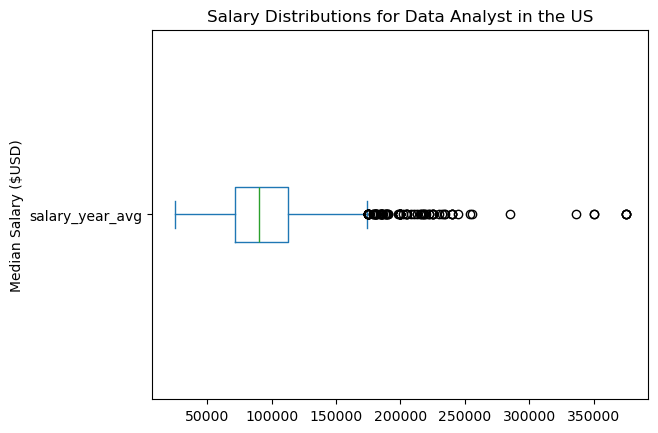

In [3]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()